<a href="https://colab.research.google.com/github/Anikate-De/TensorFlow-Deep-Learning/blob/main/Transfer%20Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Transfer Learning with TensorFlow

## What is **Transfer Learning**?

***Transfer learning*** is a machine learning method where a model developed for a task is reused as the starting point for a model on a second task.

The "second task" may be a different but related problem on which the model being used promises fruition.

There are two primary benefits of Transfer Learning -
 - Using an pre-built Neural Network Architecture instead of creating one from scratch
 - Using less data to train the Models as they have aleady been trained on an existing dataset (which is related to the current problem) and hold their features and patterns.

## Perform Transfer Learning

We use TensorFlow's dedicated platform, [TensorFlow Hub](https://tfhub.dev/) to get models for our problems.

We can filter the models based on our needs and use them in creating our models with the `tensorflow_hub` package.

### Using ImageNet-Trained Models

For our problem, of classifying pictures of food into 10 different classes, we are going to use models on TFHub which have been trained on the [ImageNet](https://www.image-net.org/) dataset. This dataset consists of millions of images of various objects, some of which are also of food items.

We use Feature Vector models as they have been trained specifically to learn various features of images in the `ImageNet` dataset.

## Download and Prepare Data

In [1]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2023-03-30 10:55:27--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 172.253.117.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   230MB/s    in 0.7s    

2023-03-30 10:55:27 (230 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [2]:
import zipfile

zipref = zipfile.ZipFile("10_food_classes_10_percent.zip", "r")
zipref.extractall()
zipref.close()

Walk the directories to see the downloaded data and its heirarchies

In [3]:
import os

for dirpath, dirname, filenames in os.walk('10_food_classes_10_percent/'):
  if len(dirname) > 0:
    print(f'Found {len(dirname)} directories in {dirpath}')
  if len(filenames) > 0:
    print(f'Found {len(filenames)} files in {dirpath}')

Found 2 directories in 10_food_classes_10_percent/
Found 10 directories in 10_food_classes_10_percent/test
Found 250 files in 10_food_classes_10_percent/test/steak
Found 250 files in 10_food_classes_10_percent/test/grilled_salmon
Found 250 files in 10_food_classes_10_percent/test/chicken_curry
Found 250 files in 10_food_classes_10_percent/test/hamburger
Found 250 files in 10_food_classes_10_percent/test/pizza
Found 250 files in 10_food_classes_10_percent/test/chicken_wings
Found 250 files in 10_food_classes_10_percent/test/sushi
Found 250 files in 10_food_classes_10_percent/test/ramen
Found 250 files in 10_food_classes_10_percent/test/fried_rice
Found 250 files in 10_food_classes_10_percent/test/ice_cream
Found 10 directories in 10_food_classes_10_percent/train
Found 75 files in 10_food_classes_10_percent/train/steak
Found 75 files in 10_food_classes_10_percent/train/grilled_salmon
Found 75 files in 10_food_classes_10_percent/train/chicken_curry
Found 75 files in 10_food_classes_10_per

In [4]:
class_names = sorted(os.listdir('10_food_classes_10_percent/train'))
num_classes = len(class_names)
class_names, num_classes

(['chicken_curry',
  'chicken_wings',
  'fried_rice',
  'grilled_salmon',
  'hamburger',
  'ice_cream',
  'pizza',
  'ramen',
  'steak',
  'sushi'],
 10)

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimp
import random

# Create a function to show random images
def view_random_images(target_dir, target_class, num_images = 1):
  """
    Selects Random Images based on the `target_dir` parent directory and `target_class` child directory

    Params:
      (str) target_dir: The path of the parent directory which holds a list of child directories.
      (str) target_class: The name of the child directory which contains images
      (int) num_images: The number of images to display in the output, maximum allowed number is `10`.

    Returns:
      None

    Outputs:
      (Conditional) Warning Statement
      A matplotlib.pyplot figure of <num_images> images.
  """
  target_folder = target_dir + target_class

  if (num_images > 10):
    print('A maximum of 10 images is allowed')
    num_images = 10

  # Get a random image path
  random_images = random.sample(os.listdir(target_folder), num_images)

  plt.figure(figsize = (18, 6))

  for index in range(len(random_images)):
    # Read the image using MatplotLib
    img = mpimp.imread(target_folder + '/' + random_images[index])
    plt.subplot(2, 5, index + 1)
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')

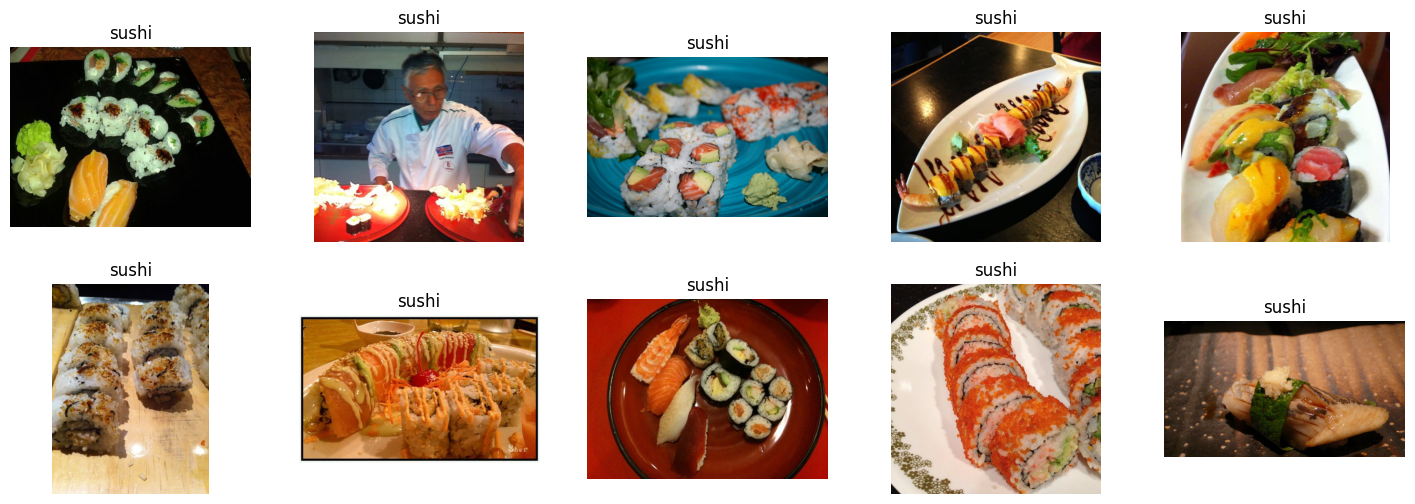

In [6]:
import random
view_random_images(target_dir='10_food_classes_10_percent/train/',
                        target_class=random.choice(class_names),
                   num_images = 10)

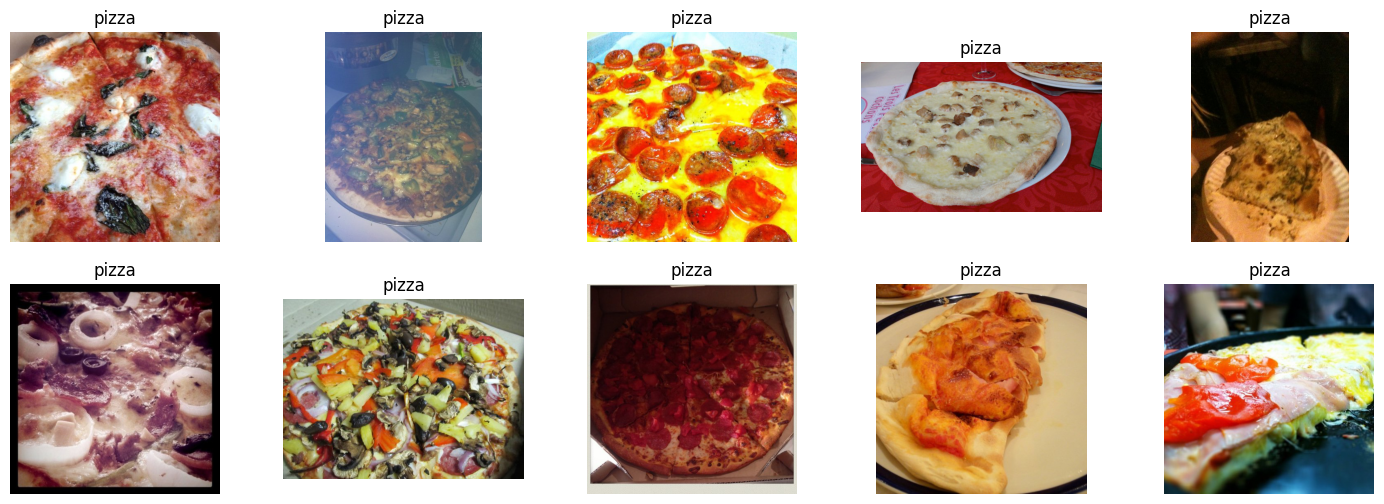

In [7]:
view_random_images(target_dir='10_food_classes_10_percent/train/',
                        target_class=random.choice(class_names),
                   num_images = 10)

Use `ImageDataGenerator` to get images from training and testing directories

In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(4)

# Rescale the data and create data generator instances
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Import data and turn it into batches
train_data = train_datagen.flow_from_directory('10_food_classes_10_percent/train',
                                               batch_size = 32,
                                               target_size = (224, 224),
                                               class_mode = 'categorical',
                                               seed = 4)
test_data = test_datagen.flow_from_directory('10_food_classes_10_percent/test',
                                               batch_size = 32,
                                               target_size = (224, 224),
                                               class_mode = 'categorical',
                                               seed = 4)

Found 750 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


## TensorBoard

[**TensorBoard**](https://tensorboard.dev/) is a useful tool that lets you evaluate and compare models during and after experimentation.

After a certain point, it becomes tedious to scroll all the way up and find different models, their architectures and summaries. TensorBoard helps us deal with this problem.

The platform [Weights & Biases](https://wandb.ai/site) can also be combined with TensorBoard to provide a more detailed report after each experiment.

To use TensordBoard, we need to make a callback that will be called during each epoch of training of the model. This can be done with the help of the pre-defined TensorBoard callback in `keras.callbacks`


In [9]:
import datetime

log_dir="logs/efficientnet/b7/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

efficientnet_b7_tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

## Create Models

In [10]:
import tensorflow_hub as hub

efficientnet_b7_model = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/tensorflow/efficientnet/b7/feature-vector/1",
                   trainable=False),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

efficientnet_b7_model.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

efficientnet_b7_history = efficientnet_b7_model.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data),
                      callbacks = [efficientnet_b7_tensorboard_callback])

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Epoch 1/5
24/24 [==============================] - 75s 2s/step - loss: 1.5566 - accuracy: 0.5853 - val_loss: 0.9352 - val_accuracy: 0.8016
Epoch 2/5
24/24 [==============================] - 34s 1s/step - loss: 0.7820 - accuracy: 0.8267 - val_loss: 0.6584 - val_accuracy: 0.8340
Epoch 3/5
24/24 [==============================] - 35s 1s/step - loss: 0.5827 - accuracy: 0.8640 - val_loss: 0.5678 - val_accuracy: 0.8488
Epoch 4/5
24/24 [==============================] - 34s 1s/step - loss: 0.4811 - accuracy: 0.8893 - val_loss: 0.5249 - val_accuracy: 0.8560
Epoch 5/5
24/24 [==============================] - 34s 1s/step - loss: 0.4110 - accuracy: 0.9067 - val_loss: 0.4944 - val_accuracy: 0.8596


In [11]:
import datetime
import tensorflow_hub as hub

log_dir="logs/mobilenet/v2_100/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

mobilenet_v2_100_tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

mobilenet_v2_100_model = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/5",
                   trainable=False),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

mobilenet_v2_100_model.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

mobilenet_v2_100_history = mobilenet_v2_100_model.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data),
                      callbacks = [mobilenet_v2_100_tensorboard_callback])

Epoch 1/5
24/24 [==============================] - 22s 752ms/step - loss: 1.8797 - accuracy: 0.3880 - val_loss: 1.2857 - val_accuracy: 0.6192
Epoch 2/5
24/24 [==============================] - 16s 693ms/step - loss: 1.0291 - accuracy: 0.7227 - val_loss: 0.8934 - val_accuracy: 0.7420
Epoch 3/5
24/24 [==============================] - 25s 1s/step - loss: 0.7241 - accuracy: 0.8040 - val_loss: 0.7562 - val_accuracy: 0.7672
Epoch 4/5
24/24 [==============================] - 16s 699ms/step - loss: 0.5913 - accuracy: 0.8413 - val_loss: 0.6945 - val_accuracy: 0.7876
Epoch 5/5
24/24 [==============================] - 16s 692ms/step - loss: 0.4888 - accuracy: 0.8867 - val_loss: 0.6507 - val_accuracy: 0.7956


In [12]:
import datetime
import tensorflow_hub as hub

log_dir="logs/resnet/v1_50/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

resnet_v1_50_tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

resnet_v1_50_model = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/tensorflow/resnet_50/feature_vector/1",
                   trainable=False),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

resnet_v1_50_model.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

resnet_v1_50_history = resnet_v1_50_model.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data),
                      callbacks = [resnet_v1_50_tensorboard_callback])

Epoch 1/5
24/24 [==============================] - 28s 883ms/step - loss: 2.0255 - accuracy: 0.3493 - val_loss: 1.1706 - val_accuracy: 0.6116
Epoch 2/5
24/24 [==============================] - 18s 754ms/step - loss: 0.8930 - accuracy: 0.7093 - val_loss: 0.7778 - val_accuracy: 0.7500
Epoch 3/5
24/24 [==============================] - 19s 796ms/step - loss: 0.6134 - accuracy: 0.8120 - val_loss: 0.6810 - val_accuracy: 0.7724
Epoch 4/5
24/24 [==============================] - 18s 755ms/step - loss: 0.4541 - accuracy: 0.8840 - val_loss: 0.6053 - val_accuracy: 0.8076
Epoch 5/5
24/24 [==============================] - 18s 781ms/step - loss: 0.3492 - accuracy: 0.9200 - val_loss: 0.5814 - val_accuracy: 0.8064


## Upload the TensorBoard Logs

After successful experimentation, you can upload the TensorFlow logs folder to the platform. 

> **Note:** Once the data is pushed online, it is available to the public and hence, no private datasets should be pushed.

In [13]:
!tensorboard dev upload --logdir ./logs \
  --name "Image Classification with Transfer Learning" \
  --description "Using prominent Image Feature Vector DL models from TensorFlow Hub to categorically classify images of food and comparing the results." \
  --one_shot

2023-03-30 11:06:55.203754: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-03-30 11:06:55.203857: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-03-30 11:06:55.203877: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./logs

This TensorBoard will be v

Plot the loss and accuracy Curves v/s epochs

## Evaluate Models

In [14]:
import pandas as pd

def plot_curves(history, loss_function):
  """

    Plots Curves using model training history.

    Params:
      (tensorflow.keras.callbacks.History) history: The History object that is obtained upon fitting the model.
      (str) loss_function: The Loss Function that has been used to calculate the loss of the model.

    Returns:
      None

    Output:
      A matplotlib.pyplot figure of <num_images> images.

  """
  
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  pd.DataFrame({'Loss': loss, 'Validation Loss': val_loss}).plot(title = 'Loss Curves', xlabel = 'Epoch', ylabel = loss_function)
  pd.DataFrame({'Accuracy': accuracy, 'Validation Accuracy': val_accuracy}).plot(title = 'Accuracy Curves', xlabel = 'Epoch', ylabel = 'Accuracy')

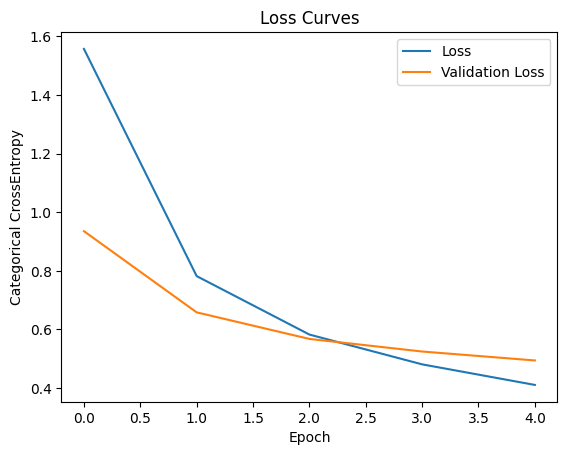

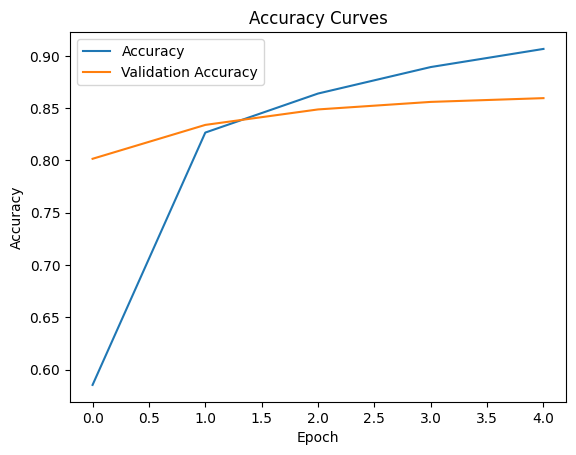

In [15]:
plot_curves(efficientnet_b7_history, 'Categorical CrossEntropy')

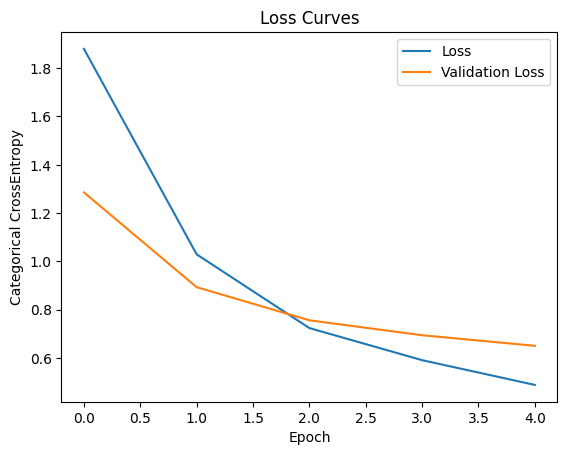

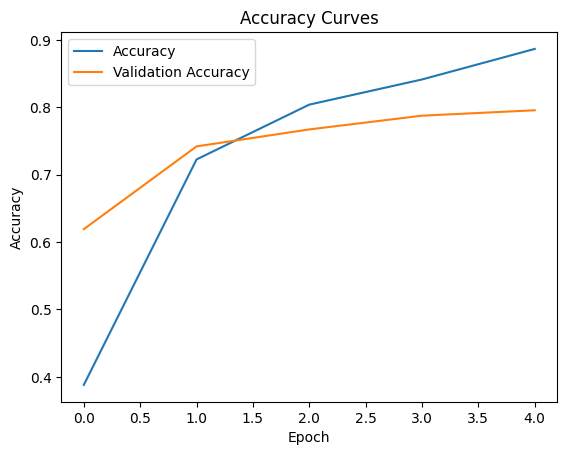

In [16]:
plot_curves(mobilenet_v2_100_history, 'Categorical CrossEntropy')

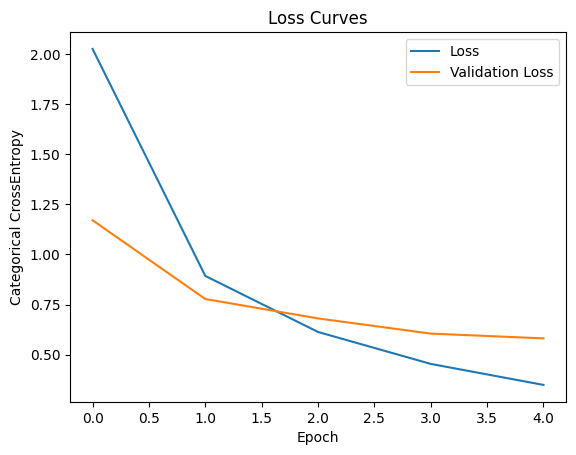

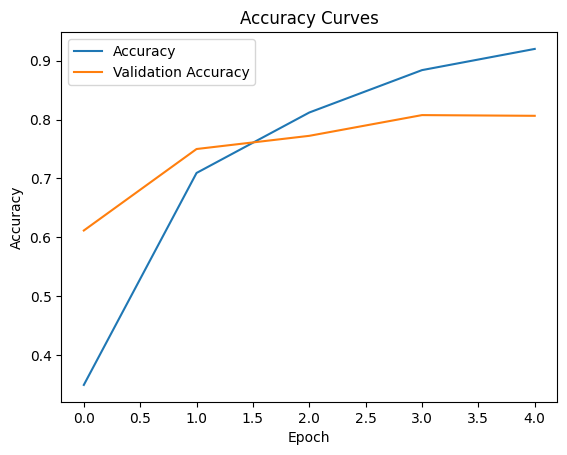

In [17]:
plot_curves(resnet_v1_50_history, 'Categorical CrossEntropy')

## Make & Display Predictions

In [18]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimp
import random

# Create a function to show random images
def predict_random_images_multiclass(target_dir, model, class_names, num_images = 1, target_classes = None):
  """

    Predicts a given number of random images with a model and outputs a plot of the images along with the results in brief.

    Params:
      (str) target_dir: The path of the parent directory which holds a list of child directories.
      (tensorflow.keras.Model) model: The model that should be used to make the predictions.
      (list<str>) class_names: A list of names of all the classes that can be predicted by the model. Must be in order of the predictions made, otherwise incorrect results would be rendered.
      (int) num_images: The number of images to display in the output, maximum allowed number is `10`. Default value is 1.
      (list<str> | None) target_classes: A list of the names of the target child directories (or classes) to randomly select the images from. If None, the list `class_names` is used for this purpose.

    Returns:
      None

    Outputs:
      (Conditional) Warning Statement
      A matplotlib.pyplot figure of <num_images> images.

  """

  if (num_images > 10):
    print('A maximum of 10 images is allowed')
    num_images = 10

  if target_classes == None:
    target_classes = class_names

  plt.figure(figsize = (18, 8))

  for i in range(num_images):
    random_class = random.choice(target_classes)
    target_path = target_dir + random_class
    img = mpimp.imread(target_path + '/' + random.choice(os.listdir(path = target_path)))
    img = tf.image.resize(img, size = [224, 224])
    img /= 255

    plt.subplot(2, 5, i + 1)
    plt.imshow(img)


    # Make a prediction
    pred = model.predict(tf.expand_dims(img, axis=0), verbose = 0)

    # Get the predicted class
    pred_class = class_names[pred.argmax()]

    if pred_class == random_class:
      color = 'green'
    else:
      color = 'red'

    plt.title(f'Prediction: {pred_class.title()}\nTrue: {random_class.title()}\nConfidence: {(tf.reduce_max(pred) * 100):.2f}%', fontdict = {'color' : color})
    plt.axis('off')

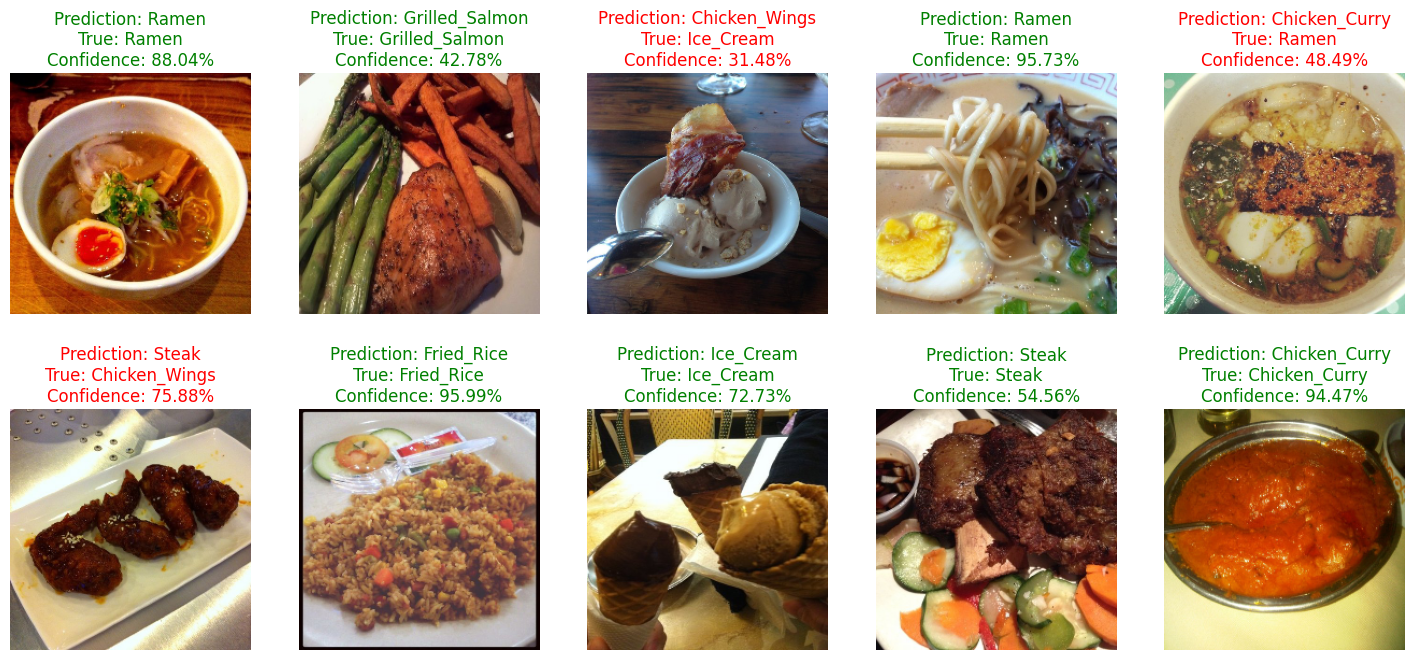

In [19]:
predict_random_images_multiclass(target_dir = '10_food_classes_10_percent/test/', model = efficientnet_b7_model, class_names = class_names, num_images = 10)

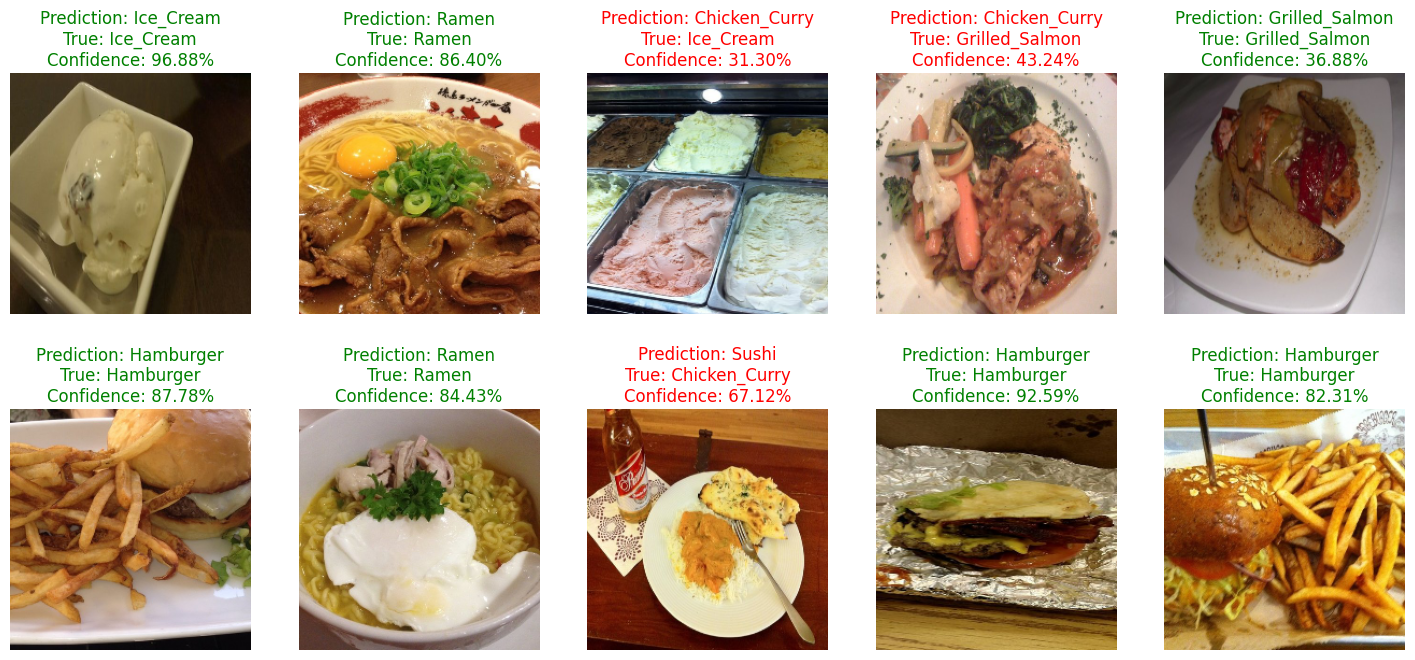

In [21]:
predict_random_images_multiclass(target_dir = '10_food_classes_10_percent/test/', model = mobilenet_v2_100_model, class_names = class_names, num_images = 10)

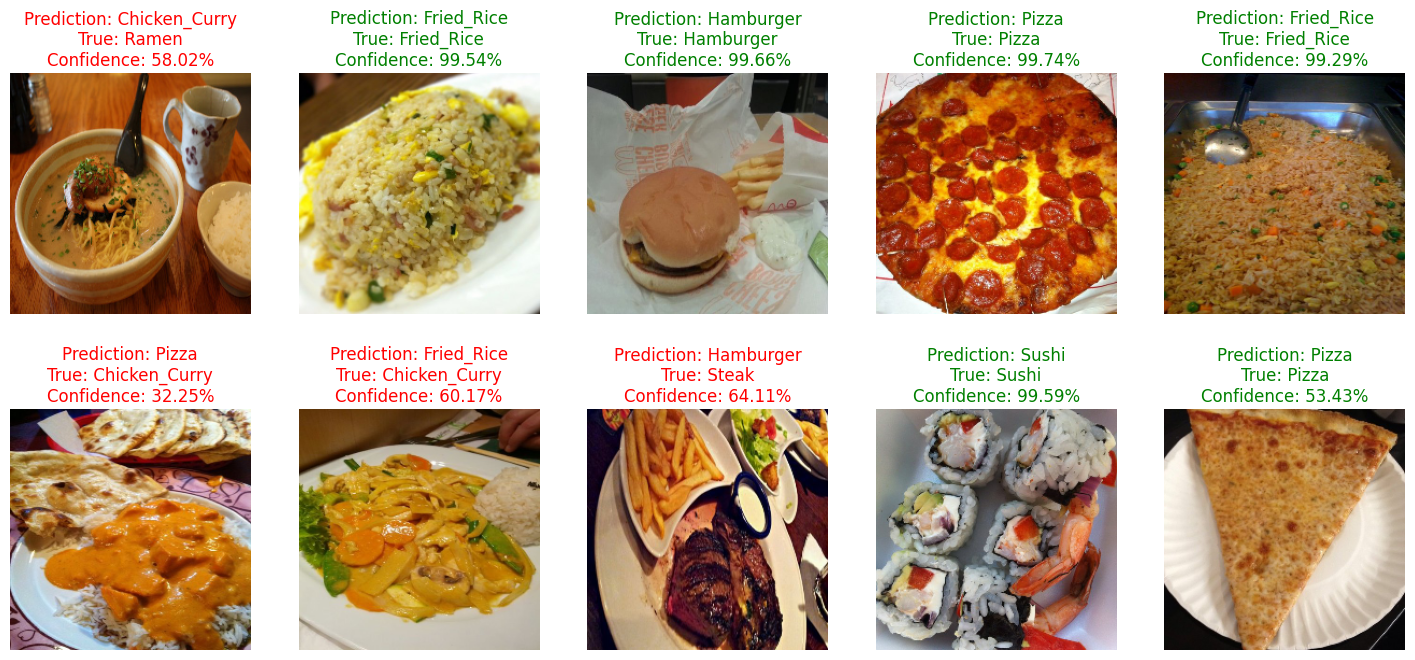

In [22]:
predict_random_images_multiclass(target_dir = '10_food_classes_10_percent/test/', model = resnet_v1_50_model, class_names = class_names, num_images = 10)